In [1]:
%run ../StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
###################
# LOCAL VARIABLES #
###################

states = ['MI', 'SD', 'HI', 'MD', 'AR', 'MO', 'FL', 'MN', 'NJ',
          'KY', 'WY', 'OK', 'ME', 'DC', 'GA', 'CA', 'SC', 'WV',
          'RI', 'TX', 'AL', 'AZ', 'UT', 'PA', 'NH', 'KS', 'DE',
          'NE', 'MS', 'WI', 'LA', 'IL', 'ND', 'CT', 'OH', 'IA',
          'IN', 'NM', 'TN', 'WA', 'AK', 'NY', 'VA', 'NC', 'ID',
          'MT', 'NV', 'CO', 'OR']
state_label = "All States"

In [3]:
data2014 = pd.read_csv("../0-Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("../0-Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("../0-Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("../0-Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [5]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [6]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [7]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [8]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [10]:
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [11]:
dfs_new, _ = normalize_empirical_data_to_avg_2017_dollars(dfs, states)

Cbar is 4398.953
MI 14 Ratio is 1.308
SD 14 Ratio is 1.155
HI 14 Ratio is 1.175
MD 14 Ratio is 1.238
AR 14 Ratio is 1.473
MO 14 Ratio is 1.414
FL 14 Ratio is 1.199
MN 14 Ratio is 1.182
NJ 14 Ratio is 1.173
KY 14 Ratio is 1.389
WY 14 Ratio is 1.016
OK 14 Ratio is 1.244
ME 14 Ratio is 1.188
DC 14 Ratio is 1.139
GA 14 Ratio is 1.260
CA 14 Ratio is 1.154
SC 14 Ratio is 1.115
WV 14 Ratio is 1.032
RI 14 Ratio is 1.009
TX 14 Ratio is 1.184
AL 14 Ratio is 1.156
AZ 14 Ratio is 1.497
UT 14 Ratio is 1.628
PA 14 Ratio is 1.105
NH 14 Ratio is 1.061
KS 14 Ratio is 1.392
DE 14 Ratio is 1.153
NE 14 Ratio is 1.265
MS 14 Ratio is 1.361
WI 14 Ratio is 1.127
LA 14 Ratio is 1.184
IL 14 Ratio is 1.083
ND 14 Ratio is 1.202
CT 14 Ratio is 0.990
OH 14 Ratio is 1.264
IA 14 Ratio is 1.318
IN 14 Ratio is 1.261
NM 14 Ratio is 1.142
TN 14 Ratio is 1.447
WA 14 Ratio is 1.199
AK 14 Ratio is 0.763
NY 14 Ratio is 0.973
VA 14 Ratio is 1.250
NC 14 Ratio is 1.254
ID 14 Ratio is 1.484
MT 14 Ratio is 1.184
NV 14 Ratio is 1.

In [12]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [13]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")

In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

beta = 115100.000


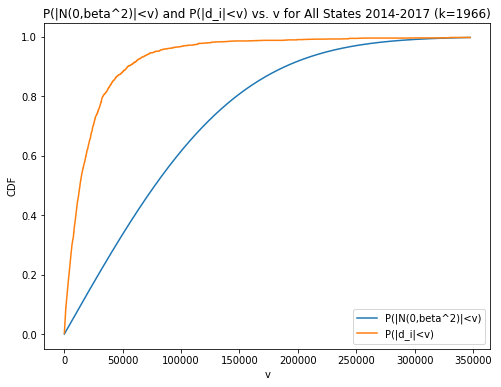

In [18]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.figure(figsize=(8, 6))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (state_label, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))
plt.legend()
plt.xlabel("v")
plt.ylabel("CDF")
plt.show()

In [19]:
beta_theoretical, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2, False)

k = 1966
test_stat at this k = 0.02752

At the point of maximum difference with beta = 115100:
P(|d_i|<v) = 0.7986
P(|N(0,max_beta^2)|<v) = 0.2243
Difference = 0.5743




At the point of maximum difference with beta = 105100:
P(|d_i|<v) = 0.7986
P(|N(0,max_beta^2)|<v) = 0.2450
Difference = 0.5536




At the point of maximum difference with beta = 95100:
P(|d_i|<v) = 0.7986
P(|N(0,max_beta^2)|<v) = 0.2698
Difference = 0.5288




At the point of maximum difference with beta = 85100:
P(|d_i|<v) = 0.7986
P(|N(0,max_beta^2)|<v) = 0.3001
Difference = 0.4985




At the point of maximum difference with beta = 75100:
P(|d_i|<v) = 0.7925
P(|N(0,max_beta^2)|<v) = 0.3315
Difference = 0.4609




At the point of maximum difference with beta = 65100:
P(|d_i|<v) = 0.7925
P(|N(0,max_beta^2)|<v) = 0.3787
Difference = 0.4138




At the point of maximum difference with beta = 55100:
P(|d_i|<v) = 0.7269
P(|N(0,max_beta^2)|<v) = 0.3686
Difference = 0.3582




At the point of maximum difference with beta = 4

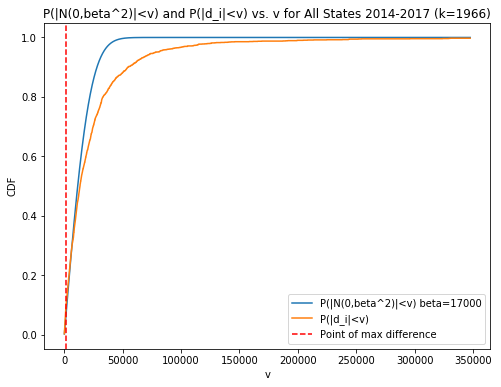

In [20]:
beta_theoretical = beta_theoretical+100

theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.figure(figsize=(8, 6))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (state_label, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
plt.xlabel("v")
plt.ylabel("CDF")
plt.show()

In [21]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)

Theoretical Test Results
Beta (=std): 17000
Number of T/sqrt(n) above 2 stds: 381
Proportion of T/sqrt(n) above 2 stds: 0.194
P value = 0.000000


In [22]:
#ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical - 10000)
#ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical)
#ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical + 10000)

In [23]:
#theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

#plt.figure(figsize=(10, 7))
#plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta_theoretical))
#plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
#plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta_theoretical - 10000))
#plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta_theoretical))
#plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta_theoretical + 10000))
#plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (state_label, len(df2)))
#plt.legend()
#plt.show()

In [24]:
beta_sims = list()

for i in range(5):
    beta_sim, _= run_test_against_simulation(states, dfs_new, beta_theoretical - 3000, ratios2, False)
    beta_sims.append(beta_sim)

k = 1966
test_stat at this k = 0.02752

At the point of maximum difference with beta = 18000:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0997
Difference = 0.0351




At the point of maximum difference with beta = 17900:
P(|d_i|<v) = 0.1933
P(|N(0,max_beta^2)|<v) = 0.1622
Difference = 0.0311




At the point of maximum difference with beta = 17800:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1007
Difference = 0.0340




At the point of maximum difference with beta = 17700:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1000
Difference = 0.0348




At the point of maximum difference with beta = 17600:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1018
Difference = 0.0330




At the point of maximum difference with beta = 17500:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1013
Difference = 0.0335




At the point of maximum difference with beta = 17400:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1057
Difference = 0.0291




At the point of maximum difference with beta = 173


At the point of maximum difference with beta = 17300:
P(|d_i|<v) = 0.1089
P(|N(0,max_beta^2)|<v) = 0.0782
Difference = 0.0307




At the point of maximum difference with beta = 17200:
P(|d_i|<v) = 0.0900
P(|N(0,max_beta^2)|<v) = 0.0604
Difference = 0.0296




At the point of maximum difference with beta = 17100:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1029
Difference = 0.0319




At the point of maximum difference with beta = 17000:
P(|d_i|<v) = 0.1089
P(|N(0,max_beta^2)|<v) = 0.0771
Difference = 0.0317




At the point of maximum difference with beta = 16900:
P(|d_i|<v) = 0.1089
P(|N(0,max_beta^2)|<v) = 0.0815
Difference = 0.0274 NOT > test_stat


In [25]:
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)

Simulation without Adjustment Test Results
Beta (=std): 16760
Number of T/sqrt(n) above 2 stds: 388
Proportion of T/sqrt(n) above 2 stds: 0.197
P value = 0.000000
Beta (=std): 16760
Number of T/sqrt(n) above 3 stds: 229
Proportion of T/sqrt(n) above 3 stds: 0.116
P value = 0.000000


In [26]:
beta_sim_adjs = list()

for i in range(5):
    beta_sim_adj, _, sum_sqrt_a = run_test_against_simulation_adjust_for_imbalances(states, dfs_new,
                                                                   beta_theoretical - 3000, ratios2, False)
    beta_sim_adjs.append(beta_sim_adj)

k = 1966
test_stat at this k = 0.02752
Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18000:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1007
Difference = 0.0340



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 17900:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1003
Difference = 0.0345



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 17800:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0994
Difference = 0.0354



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 17700:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1027
Difference = 0.0320



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 17600:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1020
Difference = 0.0328



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 17500:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1019
Difference = 0.0329



Sum sqrt(a) = 205454.441

At th

Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 16900:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1059
Difference = 0.0289



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 16800:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1041
Difference = 0.0307



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 16700:
P(|d_i|<v) = 0.1089
P(|N(0,max_beta^2)|<v) = 0.0801
Difference = 0.0288



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 16600:
P(|d_i|<v) = 0.1089
P(|N(0,max_beta^2)|<v) = 0.0831
Difference = 0.0257 NOT > test_stat
E(|X|) = 2721220174.566
k = 1966
test_stat at this k = 0.02752
Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18000:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0994
Difference = 0.0354



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 17900:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1029
Difference = 0.03

In [27]:
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Simulation WITH Adjustment Test Results
Beta (=std): 16700
Number of T/sqrt(n) above 2 stds: 390
Proportion of T/sqrt(n) above 2 stds: 0.198
P value = 0.000000
Beta (=std): 16700
Number of T/sqrt(n) above 3 stds: 230
Proportion of T/sqrt(n) above 3 stds: 0.117
P value = 0.000000


In [28]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)
run_binom_stat_test3(beta_theoretical, df2.values)
print("\n")
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)
print("\n")
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Theoretical Test Results
Beta (=std): 17000
Number of T/sqrt(n) above 2 stds: 381
Proportion of T/sqrt(n) above 2 stds: 0.194
P value = 0.000000
Beta (=std): 17000
Number of T/sqrt(n) above 3 stds: 223
Proportion of T/sqrt(n) above 3 stds: 0.113
P value = 0.000000


Simulation without Adjustment Test Results
Beta (=std): 16760
Number of T/sqrt(n) above 2 stds: 388
Proportion of T/sqrt(n) above 2 stds: 0.197
P value = 0.000000
Beta (=std): 16760
Number of T/sqrt(n) above 3 stds: 229
Proportion of T/sqrt(n) above 3 stds: 0.116
P value = 0.000000


Simulation WITH Adjustment Test Results
Beta (=std): 16700
Number of T/sqrt(n) above 2 stds: 390
Proportion of T/sqrt(n) above 2 stds: 0.198
P value = 0.000000
Beta (=std): 16700
Number of T/sqrt(n) above 3 stds: 230
Proportion of T/sqrt(n) above 3 stds: 0.117
P value = 0.000000


In [29]:
np.mean(beta_sims) * sum_sqrt_a * np.sqrt(2) / np.sqrt(np.pi)

2747448802.754159

In [30]:
np.mean(beta_sim_adjs) * sum_sqrt_a * np.sqrt(2) / np.sqrt(np.pi)

2737613067.1834397

In [31]:
beta_sims

[16600, 16500, 16600, 17200, 16900]

In [32]:
beta_sim_adjs

[16600, 16800, 16800, 16600, 16700]